# Building a Comprehensive Video Game Recommendation System

## Introduction
In the rapidly growing video game industry, players often face the challenge of discovering new games that match their interests and preferences. With thousands of games released across various platforms and genres, finding the next game to play can be overwhelming. This project aims to address this challenge by developing a comprehensive video game recommendation system.

Leveraging the `Video Game Sales with Ratings` dataset from Kaggle, our objective is to create a recommender system that suggests video games based on user preferences and game similarities. The dataset includes key information about video games such as titles, platforms, release years, genres, sales figures, and ratings, providing a rich source of data for building our models.

We will explore multiple recommendation approaches to ensure a robust and versatile system:
1. **Cosine Similarity-Based Recommender:** A content-based approach that measures the similarity between games based on their attributes.
2. **Simple Recommender:** A non-personalized recommendation method that suggests popular games based on sales and ratings.
3. **Content-Based Recommender:** Utilizes text-based features like game descriptions to find similar games.
4. **Collaborative Filtering:** A personalized recommendation method that leverages user interaction data to suggest games.

The project will be structured as follows:
1. **Dataset Overview:** Introducing the dataset and its features.
2. **Exploratory Data Analysis (EDA):** Performing a detailed analysis to understand data distributions, trends, and patterns.
3. **Data Cleaning and Preprocessing:** Preparing the data by handling missing values, outliers, and encoding categorical variables.
4. **Feature Selection:** Identifying the most relevant features for building effective recommendation models.
5. **Model Training:** Implementing and training multiple recommendation models.
6. **Model Evaluation:** Evaluating the performance of each model using appropriate metrics.
7. **Comparison and Final Model Selection:** Comparing the models and selecting the best performing one.

Through this comprehensive approach, we aim to deliver a recommendation system that enhances the gaming experience by providing personalized and relevant game suggestions.

## Dataset Overview
The Dataset Overview section provides a comprehensive introduction to the Video_Games_Sales_as_at_22_Dec_2016.csv dataset. This dataset contains information about video game sales across various platforms up to December 22, 2016. It includes key features such as game titles, platforms, release years, genres, sales figures across different regions, and critic and user ratings. This section will load the dataset, display its structure, and summarize the main characteristics of the data, laying the foundation for further analysis and model building.

In [4]:
# Importing necessary libraries
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

In [5]:
# Loading the dataset
file_path = '../data/Video_Games_Sales_as_at_22_Dec_2016.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(df.head())

# Display the summary of the dataset
print("\nDataset summary:")
display(df.info())

# Display basic statistics for numerical columns
print("\nBasic statistics for numerical columns:")
display(df.describe())

# Display the list of columns and their descriptions
print("\nList of columns:")
columns = {
    'Name': 'Name of the video game',
    'Platform': 'Platform of the video game release (e.g., PS4, Xbox One, PC)',
    'Year_of_Release': 'Year of release of the video game',
    'Genre': 'Genre of the video game (e.g., Action, Sports, RPG)',
    'Publisher': 'Publisher of the video game',
    'NA_Sales': 'Sales in North America (in millions)',
    'EU_Sales': 'Sales in Europe (in millions)',
    'JP_Sales': 'Sales in Japan (in millions)',
    'Other_Sales': 'Sales in other regions (in millions)',
    'Global_Sales': 'Total worldwide sales (in millions)',
    'Critic_Score': 'Aggregate score compiled by Metacritic staff (0-100)',
    'Critic_Count': 'Number of critic reviews counted towards the Critic Score',
    'User_Score': 'Score by Metacritic’s subscribers (0-10)',
    'User_Count': 'Number of user reviews counted towards the User Score',
    'Developer': 'Developer of the video game',
    'Rating': 'ESRB rating (e.g., E for Everyone, M for Mature)',
}
for col, desc in columns.items():
    print(f"{col}: {desc}")

# Display the number of missing values in each column
print("\nNumber of missing values in each column:")
display(df.isnull().sum())

First few rows of the dataset:


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN



Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2

None


Basic statistics for numerical columns:


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000



List of columns:
Name: Name of the video game
Platform: Platform of the video game release (e.g., PS4, Xbox One, PC)
Year_of_Release: Year of release of the video game
Genre: Genre of the video game (e.g., Action, Sports, RPG)
Publisher: Publisher of the video game
NA_Sales: Sales in North America (in millions)
EU_Sales: Sales in Europe (in millions)
JP_Sales: Sales in Japan (in millions)
Other_Sales: Sales in other regions (in millions)
Global_Sales: Total worldwide sales (in millions)
Critic_Score: Aggregate score compiled by Metacritic staff (0-100)
Critic_Count: Number of critic reviews counted towards the Critic Score
User_Score: Score by Metacritic’s subscribers (0-10)
User_Count: Number of user reviews counted towards the User Score
Developer: Developer of the video game
Rating: ESRB rating (e.g., E for Everyone, M for Mature)

Number of missing values in each column:


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

**Summary of Dataset Overview**

In this section, we have loaded the `Video_Games_Sales_as_at_22_Dec_2016.csv` dataset and provided an overview of its structure and contents. We displayed the first few rows to get an initial glimpse of the data, summarized the dataset's attributes, and highlighted the key features. Additionally, we listed the columns with their descriptions and identified missing values in the dataset. This comprehensive overview sets the stage for deeper exploratory data analysis and subsequent steps in building our recommendation system.

## Exploratory Data Analysis (EDA)
The Exploratory Data Analysis (EDA) section aims to explore the `Video_Games_Sales_as_at_22_Dec_2016.csv` dataset in depth to understand its structure, distributions, and relationships between features. This step is crucial for uncovering insights and patterns that will guide the subsequent data preprocessing and model-building phases. We will use a variety of statistical summaries and visualizations to examine the distributions of sales figures, genre popularity, platform trends, and ratings. This comprehensive analysis will help identify any anomalies, trends, and key characteristics of the data.

First few rows of the dataset:


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


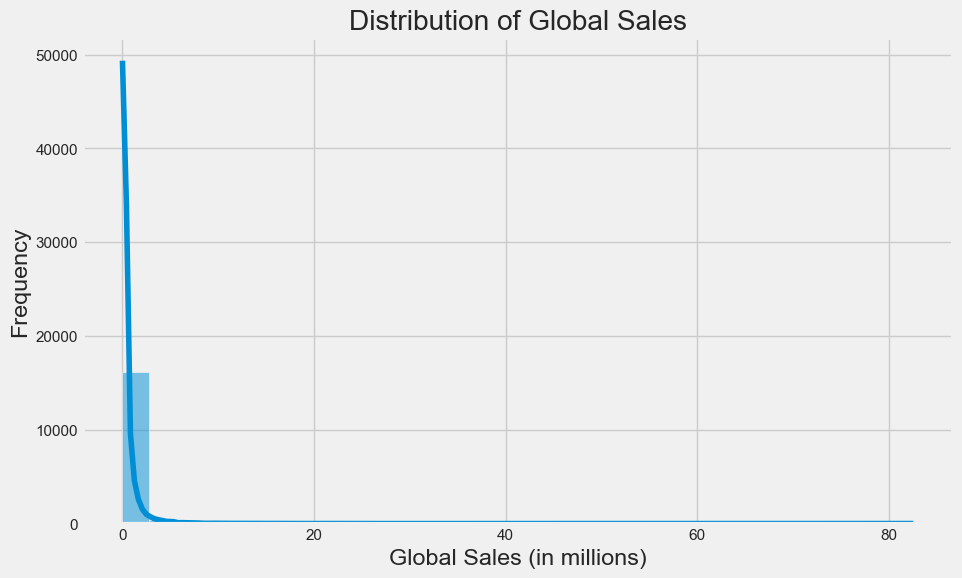

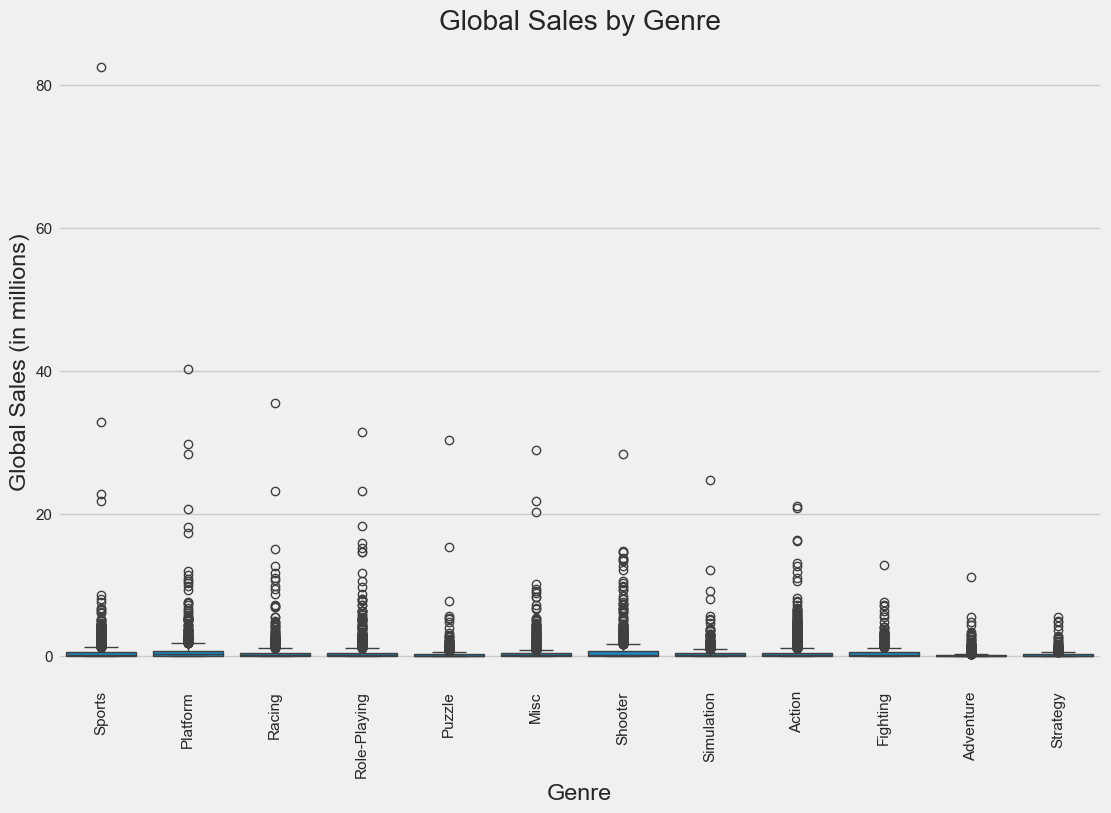

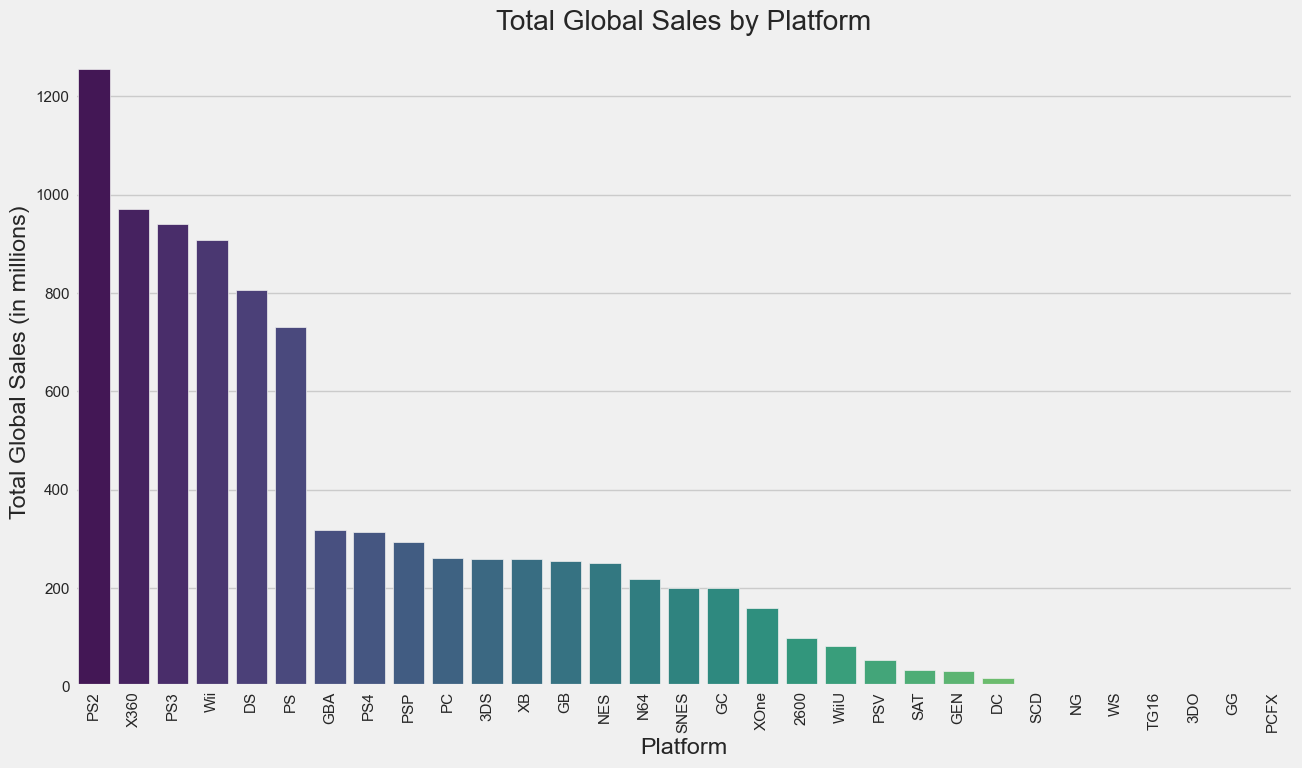

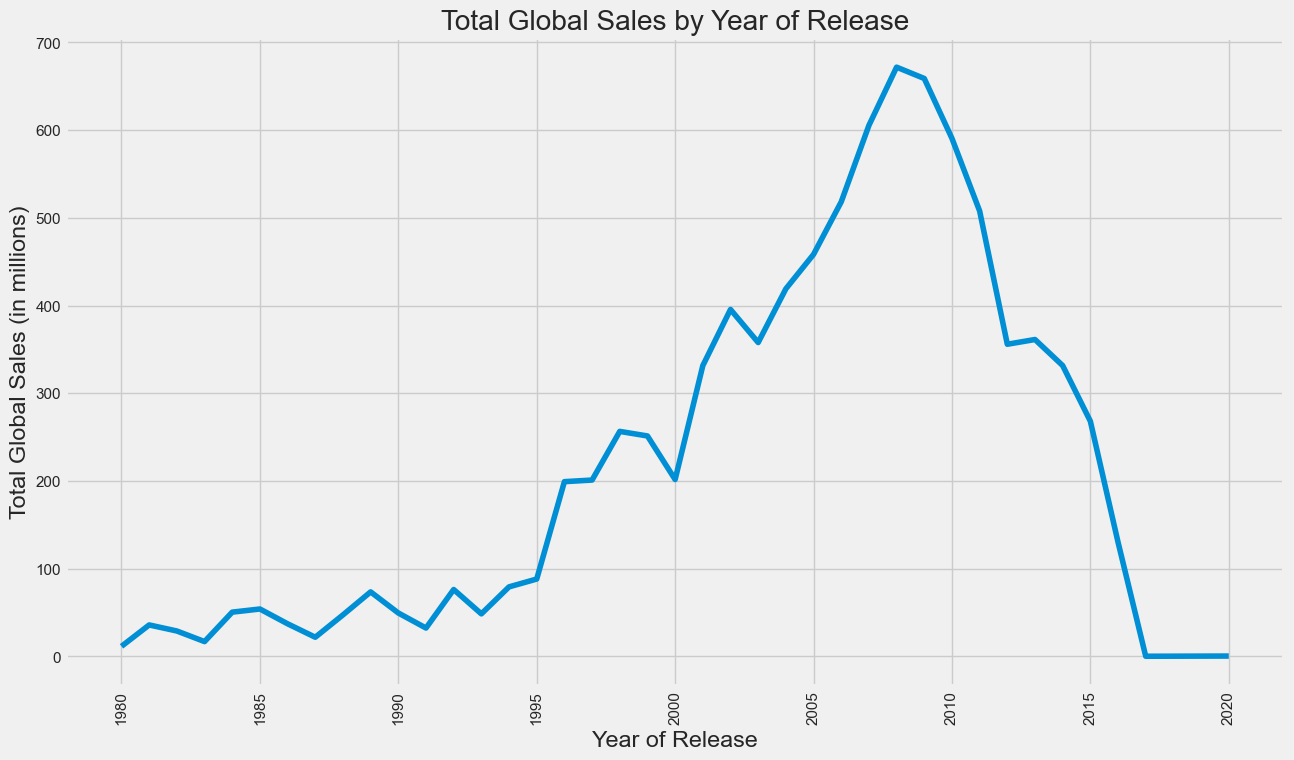

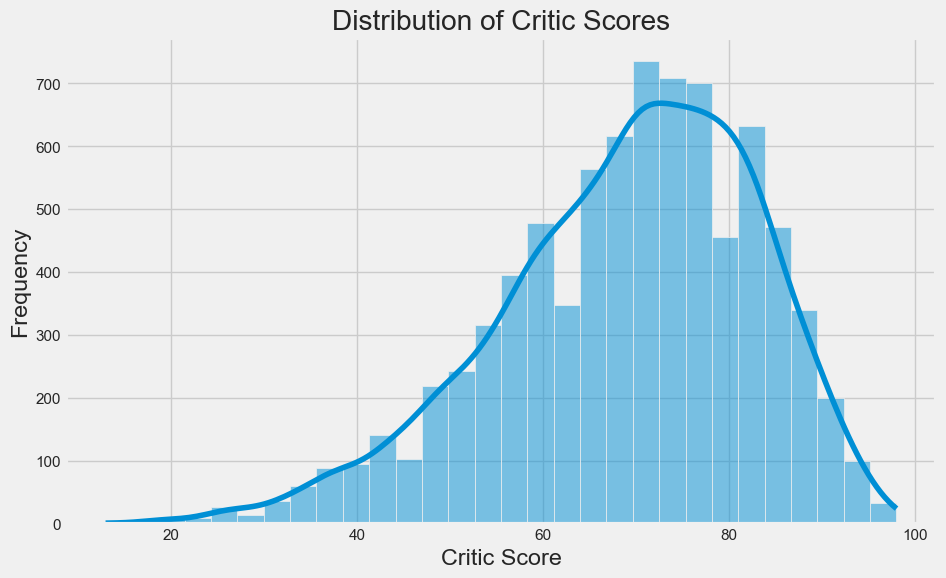

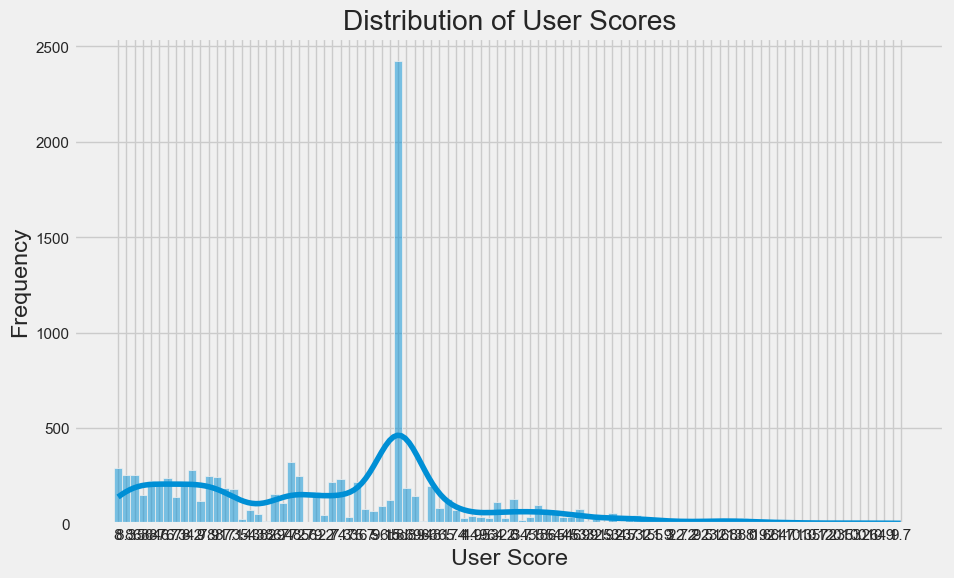

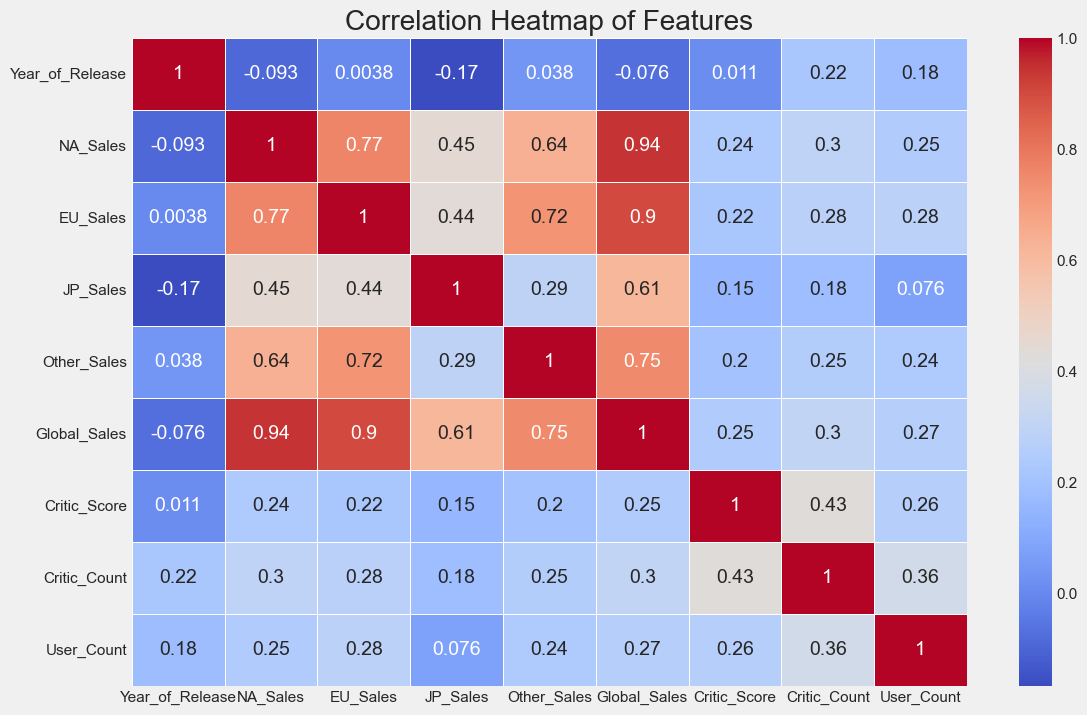

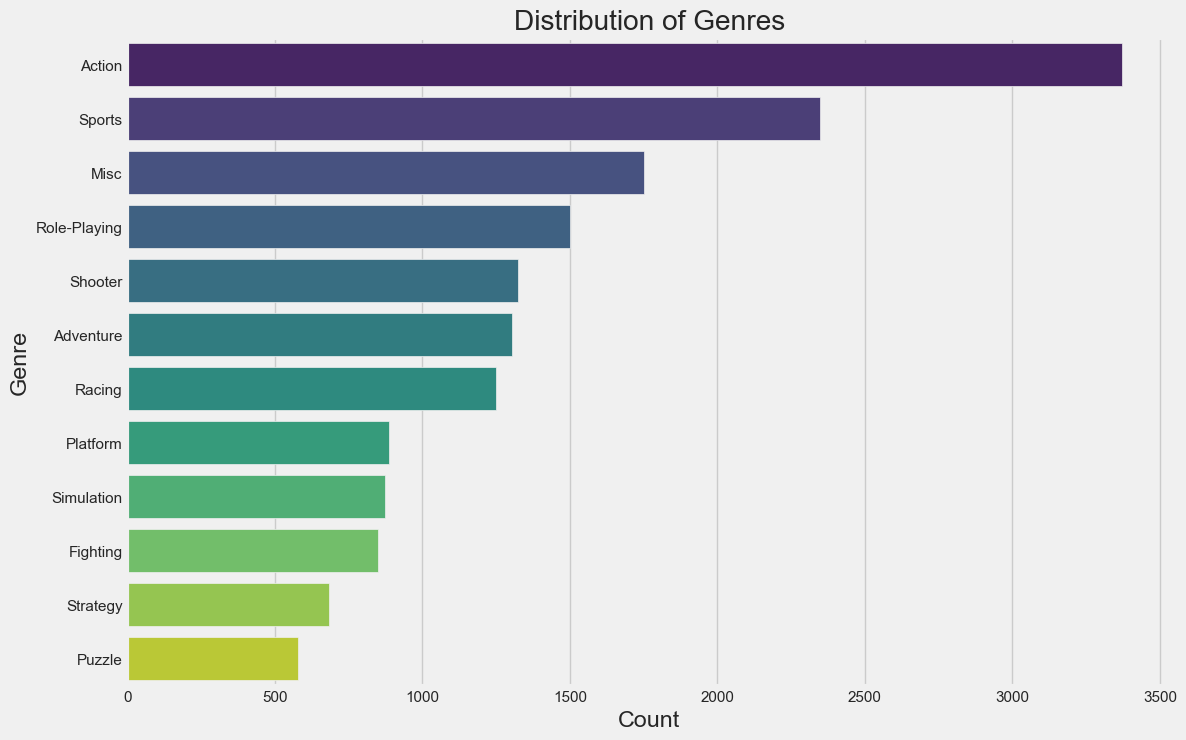

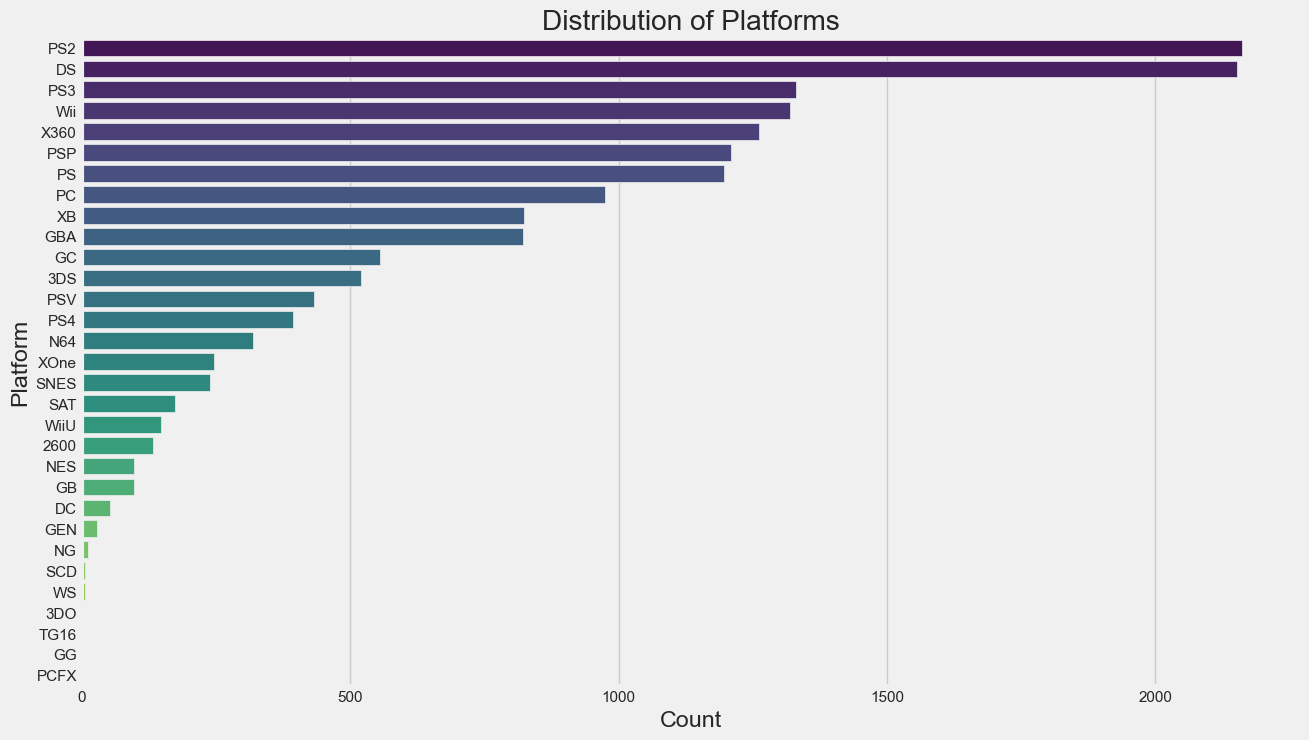

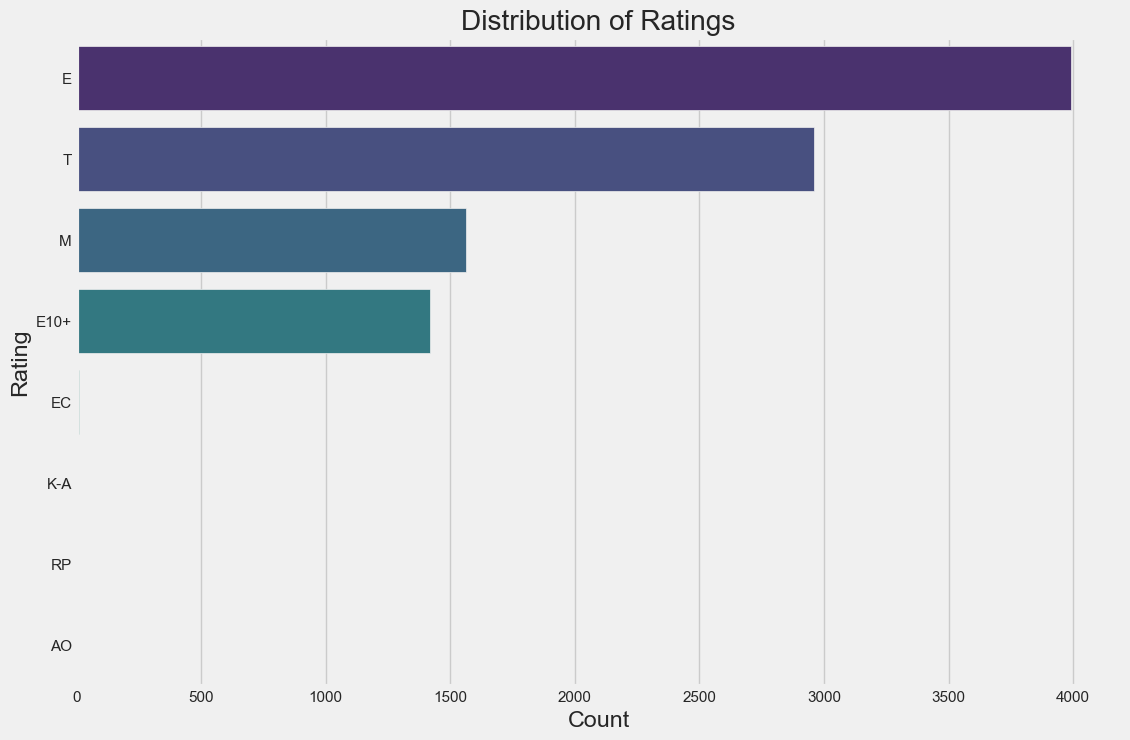

In [7]:
# Setting up visual styles
sns.set(style="whitegrid")
plt.style.use('fivethirtyeight')

# Displaying the first few rows of the dataset again for reference
print("First few rows of the dataset:")
display(df.head())

# 1. Distribution of Global Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_Sales'], kde=True, bins=30)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Frequency')
plt.show()

# 2. Sales by Genre
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Global_Sales', data=df)
plt.xticks(rotation=90)
plt.title('Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.show()

# 3. Sales by Platform
plt.figure(figsize=(14, 8))
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='viridis')
plt.title('Total Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Global Sales (in millions)')
plt.xticks(rotation=90)
plt.show()

# 4. Sales by Year of Release
plt.figure(figsize=(14, 8))
year_sales = df.groupby('Year_of_Release')['Global_Sales'].sum().sort_index()
sns.lineplot(x=year_sales.index, y=year_sales.values)
plt.title('Total Global Sales by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Total Global Sales (in millions)')
plt.xticks(rotation=90)
plt.show()

# 5. Distribution of Critic Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Critic_Score'].dropna(), kde=True, bins=30)
plt.title('Distribution of Critic Scores')
plt.xlabel('Critic Score')
plt.ylabel('Frequency')
plt.show()

# 6. Distribution of User Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['User_Score'].dropna(), kde=True, bins=30)
plt.title('Distribution of User Scores')
plt.xlabel('User Score')
plt.ylabel('Frequency')
plt.show()

# 7. Correlation Heatmap (excluding non-numeric columns)
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Selecting only numeric columns
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# 8. Distribution of Genres
plt.figure(figsize=(12, 8))
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index, palette='viridis')
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# 9. Distribution of Platforms
plt.figure(figsize=(14, 8))
sns.countplot(y='Platform', data=df, order=df['Platform'].value_counts().index, palette='viridis')
plt.title('Distribution of Platforms')
plt.xlabel('Count')
plt.ylabel('Platform')
plt.show()

# 10. Distribution of Ratings
plt.figure(figsize=(12, 8))
sns.countplot(y='Rating', data=df, order=df['Rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


**Summary of Exploratory Data Analysis (EDA)**
In this EDA section, we explored the Video_Games_Sales_as_at_22_Dec_2016.csv dataset through various visualizations and statistical summaries. We analyzed the distribution of global sales, examined sales trends across different genres, platforms, and years of release, and visualized the distributions of critic and user scores. Additionally, we created a correlation heatmap to identify relationships between numerical features and explored the distributions of genres, platforms, and ratings.

We observed that there is a scarcity of data for certain platforms such as DC and certain ratings such as 'K-A', 'AO', 'EC', and 'RP'. These insights provide a deeper understanding of the dataset and will inform our data preprocessing and feature selection strategies in the subsequent steps.